<a href="https://colab.research.google.com/github/dooooing/2023-ESAA-/blob/main/0515_%EC%A0%9C%EC%B6%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch5_1~5_pg_290~319.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**파이썬 머신러닝 완벽가이드** 290-319p (303-310p 제외)

# Chap 05. 회귀

## 01. 회귀 소개

---



회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법 통칭(데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향 이용)

Y = W1*X1 + W2*X2 + ... + Wn*Xn

Y : 종속변수/X1,X2...Xn : 독립변수/W1,W2...Wn : 회귀계수

-> 독립변수는 피처, 종속변수는 결정값

=> 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

* 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀 / 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀

* 지도학습 - 분류(예측값이 이산형 클래스 값)와 회귀(연속형 숫자 값)

* **선형 회귀**가 가장 많이 사용돼
   + 선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
* 선형 회귀 모델은 규제 방법에 따라 유형 나뉘어(규제 : 회귀 계수에 페널티 값 적용하는 것)
   + 일반 선형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares를 최소화할 수 있도록 회귀 계수 최적화. 규제 적용x
   + 릿지 : 선형 회귀에 L2 규제 추가
       - L2 규제 : 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델
   + 라쏘 : 선형회귀에 L1 규제 적용
       - L1 규제 : 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것(피처 선택 기능)
   + 엘라스틱넷 : L2, L1 규제 함께 결합
       - 주로 피처가 많은 데이터 세트에서 적용
       - L1 규제로 피처 개수 줄임과 동시에 L2 규제로 계수 값의 크기 조정
   + 로지스틱 회귀 : 분류 알고리즘
       - 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류에서 뛰어난 예측 성능.

## 02. 단순 선형 회귀를 통한 회귀 이해



---


단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀

예측값 Y hat = W0 + W1*X   ( 기울기 W1, 절편 intercept W0)

실제값 Y = W0 + W1*X + 오류 값

* 실제 값과 회귀 모델의 차이에 따른 오류 값 = 잔차

=> 최적의 회귀 모델을 만든다는 것은 **전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만들고 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다**는 의미.

* 오류 합 계산할 때 -> 절댓값 취해 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해 더하는 방식(RSS, Residual Sum of Square)
   + 일반적으로 RSS 방식 이용. Error**2 = RSS

* RSS를 최소로 하는 W0, W1, 즉 회귀 계수를 학습을 통해 찾는 것. w 변수(회귀 계수)가 중심 변수임
   + RSS를 비용 함수. 손실함수라고도 함

   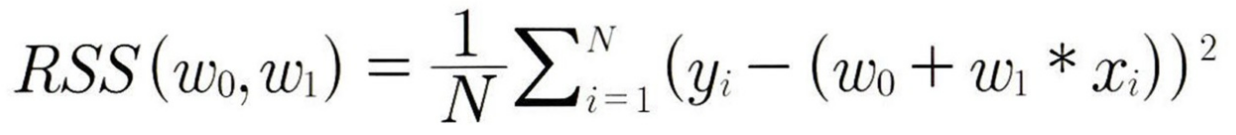

## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개



---

어떻게 비용 함수가 최소가 되는 W 파라미터 구해? -> 경사 하강법

**경사 하강법** : 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

+) 고차원 방정식에 대한 문제 해결 + 비용 함수 RSS를 최소화하는 방법 직관적으로 제공

* 경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이(오류)가 작아지는 방향성을 가지고 W 값을 계속 업데이트     -> 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W값을 최적 파라미터로 반환

* 최초 w에서부터 미분 적용한 뒤 미분 값이 계속 감소하는 방향으로 순차적으로 w 업데이트

* 비용함수는 w0, w1 파라미터 두개 -> 각 변수에 편미분

* 경사 하강법의 일반적인 프로세스
    + step 1: w0,w1를 임의의 값으로 설정. 첫 비용 함수의 값 계산
    + step 2: **w1 = w1+학습률*(2/N)*sigma(xi*(실제값-예측값))**, **w0 = w0+학습률*(2/N)*sigma(xi*(실제값-예측값))**(i는 1부터 N까지)으로 업데이트한 후 다시 비용 함수의 값 계산
    + step 3: 비용 함수 값 감소했으면 step 2 반복. 더 이상 비용 함수 값이 감소하지 않으면 그때의 w0,w1 구하고 반복 중지. 


* 단순 선형 회귀(y=4X+6)로 예측할 만한 데이터 세트 만들기

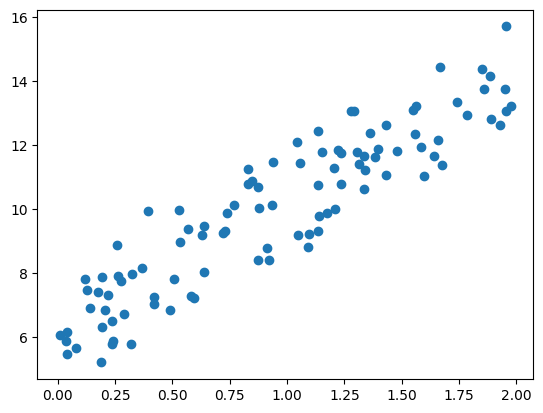

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X+np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)


- 비용 함수 정의 - 실제 y값과 예측된 y값을 인자로 받아 비용 함수 계산해 반환

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost
  

- 경사 하강법 구현 - 무작위로 생성한 X와 y 입력받아. w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하여 w값 업데이트.

In [ ]:
# w1과 w0를 업데이트 할 w1_update, w0_update 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  
  N = len(y)
  
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update


- 경사 하강 방식으로 반복적으로 수행해 w1과 w0를 업데이트하는 함수 생성

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0과 w1을 모두 0으로 초기화.
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weigth_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0


- w1과 w0 구하기. 예측값과 실제값의 RSS 차이 계산하는 함수 생성. 경사 하강법의 예측 오류도 계산

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))


w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


=> 실제 선형식인 y=4X+6과 유사하게 w1은 4.022, w0는 6.162가 도출. 예측 오류 비용은 약 0.9935

- y_pred에 기반해 회귀선 그리기

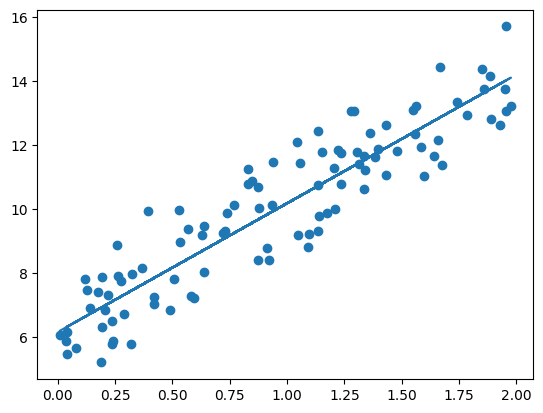

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

 경사 하강법은 수행 시간 매우 오래 걸려 -> 확률적 경사 하강법 이용

* **확률적 경사 하강법** : 일부 데이터만 이용해 w가 업데이트되는 값 계산. 빠른 속도 보장

* 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법 이용


- (미니 배치) 확률적 경사 하강법을 함수로 구현 - 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터 추출한다는 점만 차이

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X,sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0


- 만든 함수 이용해 w1,w0 및 예측 오류 비용 계산

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))


w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


=> (미니 배치) 확률적 경사 하강법으로 구한 w0,w1 결과는 경사 하강법 결과와 큰 차이x

* 피처가 여러 개인 경우 -> 1개인 경우 확장. 피처가 M개 있다면 회귀 계수도 M+1개로 도출

Y.hat = w0 + w1*X1 + w2*X2 + ... + wM*XM

=> Y.hat = np.dot(Xmat, W.T) + w0

=> w0를 W안에 포함시키기 위해 **Xmat의 맨 처음 열에 모든 데이터 값이 1을 추가**

=> Y.hat = np.dot(Xmat, W.T)

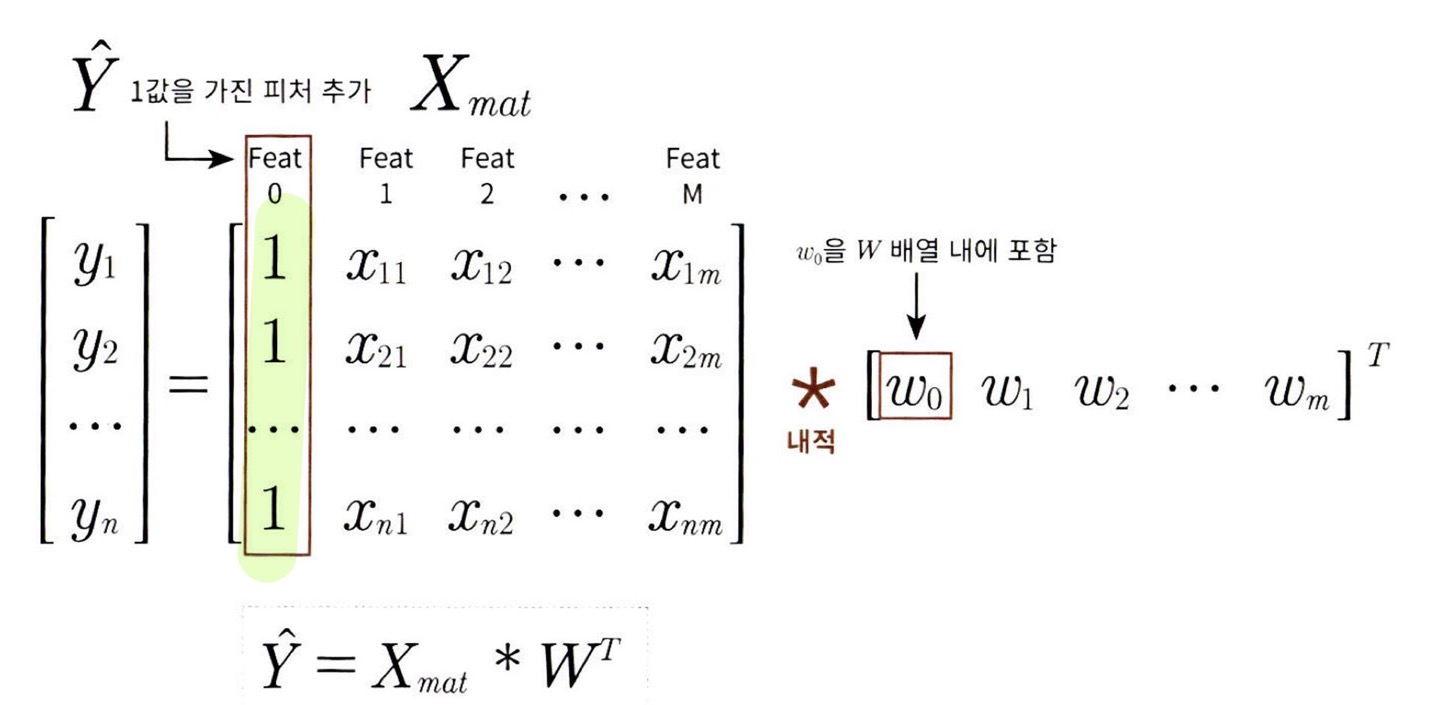


## 05. 다항 회귀와 과(대)적합/과소적합 이해



---
### 다항 회귀 이해

다항(Polynomial) 회귀 : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

y = w0+ w1*x1 + w2*x2 + w3*x1*x2 + w4*x1^2 + w5*x2^2

+) 다항회귀는 선형회귀! 선형/비선형 회귀 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것. 독립변수의 선형/비선형 여부와는 무관.

y = w0+ w1*x1 + w2*x2 + w3*x1*x2 + w4*x1^2 + w5*x2^2 -> z=[x1,x2,x1*x2,x1^2,x2^2] -> y = w0 + w1*z1 + w2*z2 + w3*z3 + w4*z4 + w5*z5라 표현 가능 (여전히 선형회귀)

* 사이킷런은 다항 회귀를 위한 클래스 명시적 제공 x -> 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현

* 사이킷런은 **PolynomialFeatures**클래스 통해 피처를 다항식 피처로 변환. **degree**파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환.

- PolynomialFeatures를 이용해 단항값 [x1,x2]를 2차 다항값으로 [1,x1,x2,x1^2,x1*x2,x2^2]로 변환하는 예제

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2 x 2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)


일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


=> 이렇게 변환된 Polynomial 피처에 선형 회귀 적용해 다항 회귀 구현

- 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스 이용해 유도. y=1+2x1+3x1^2+4*x2^2라 임의로 설정하고 함수 만들기

In [ ]:
def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)


일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


* 일차 단항식 계수를 삼차 다항식 계수로 변환. 선형 회귀에 적용하면 다항 회귀로 구현돼.
    + PolynomialFeatures(degree=3)은 단항 계수 피처 [x1,x2]를 3차 다항 계수 [1,x1,x2,x1^2,x1*x2,x2^2,x1^3,x1^2*x2,x1*x2^2,x1^3]과 같이 10개의 다항 계수로 변환

In [ ]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape: ', model.coef_.shape)



3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape:  (10,)


=> 원래 다항식 계수값인 [1,2,0,3,0,0,0,0,0,4]와 차이는 있지만 다항 회귀로 근사하고 있음

=> 사이킷런은 PolynomialFeatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀 구현

- 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다는 사이킷런의 Pipeline개게 이용해 한 번에 다항 회귀 구현

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 복잡한 다항 관계 모델링 가능. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능.

* 차수가 높아질수록 과적합의 문제가 크게 발생

* 다항 회귀 이용해 과소적합과 과적합의 문제 잘 보여주는 에제
    + 피처 X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계 가지도록

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


* 다항식 차수를 각각 1,4,15로 변경하면서 학습 수행한 뒤 cross_val_score()로 MSE 값 구해 차수별 예측 성능 평가. 차수별 회귀 예측 곡선.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 14 회귀 계수는 [-1.25185000e+03  4.12434900e+04 -6.92175040e+05  6.89002474e+06
 -4.42216310e+07  1.92759783e+08 -5.89424616e+08  1.28709008e+09
 -2.01759139e+09  2.25283123e+09 -1.74868265e+09  8.96643812e+08
 -2.73024764e+08  3.73822951e+07] 입니다.
Degree 14 MSE는 7520228.452735241 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


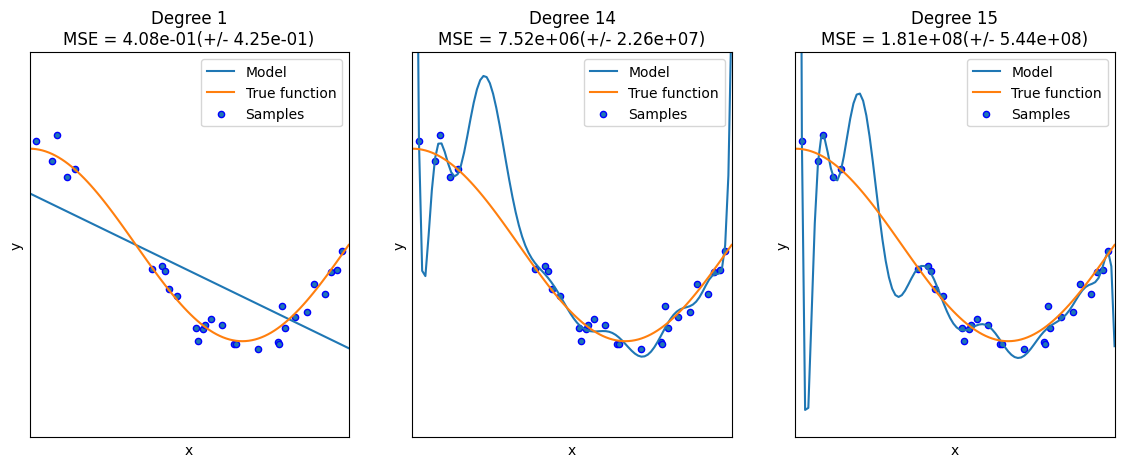

In [ ]:
plt.figure(figsize = (14, 5))
degrees = [1, 14, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree 별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)

  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0 부터 1 까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)

  # 예측 값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = "Model")

  # 실제 값 곡선
  plt.plot(X_test, true_fun(X_test), '-', label = "True function")
  plt.scatter(X, y, edgecolor = 'b', s = 20, label = "Samples")

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc = "best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], - scores.mean(), scores.std()))

plt.show()


=> Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 **과소적합** 모델.

=> Degree 4 예측 곡선은 실제 데이터 세트와 유사. 학습 데이터 세트를 비교적 잘 반영해 테스트 데이터를 잘 예측한 곡선 가진 모델. 가장 뛰어난 예측 성능

=> Degree 15 예측 곡선은 MSE 값이 182815432가 될 정도의 오류 값 발생. 학습 데이터에 너무 충실하게 맞춘 **과적합**이 심한 모델. 굉장히 높은 MSE 값


=> 좋은 예측 모델은 과소적합 모델도 아니고 과적합 모델도 아닌, 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델.

### 편향-분산 트레이드오프(Bias-Variance Trade off)

> * **고편향성**을 가졌다 = 매우 단순화된 모델. 지나치게 한 방향성으로 치우친 경향
> * **고분산**을 가졌다 = 매우 복잡한 모델. 지나치게 높은 변동성.

* 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향. -> 편향이 높으면 분산이 낮아지고(과소적합), 반대로 분산이 높으면 편향이 낮아져(과적합)

* 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델 구축하는 것이 가장 효율적인 머신러닝 예측 모델 만드는 방법.